In [1]:
# Import backtrader library
import backtrader as bt
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import warnings
# %matplotlib widget

In [2]:
# Define a trading strategy
class EMACrossStrategy(bt.Strategy):
    params = {
        ('ema1', 10),
        ('ema2', 20),
        ('atr', 14)
    }
    
    def __init__(self):
        self.ema1 = bt.indicators.EMA(period = self.params.ema1)
        self.ema2 = bt.indicators.EMA(period = self.params.ema2)
        self.atr = bt.indicators.ATR(period = self.params.atr)
        
        self.buy_condition = bt.indicators.CrossOver(self.ema1, self.ema2)
        self.sell_condition = bt.indicators.CrossOver(self.ema2, self.ema1)
        
    def next(self):
        if not self.position:
            if self.buy_condition:
                self.buy()
                self.stop_loss = self.data.close[0] - self.params.atr
                self.take_profit = self.data.close[0] + self.params.atr
                
            if self.sell_condition:
                self.sell()
                self.stop_loss = self.data.close[0] + self.params.atr
                self.take_profit = self.data.close[0] - self.params.atr
            
        if self.position.size > 0:
            if self.data.close > self.take_profit or self.data.close < self.stop_loss:
                self.close()

        if self.position.size < 0:
            if self.data.close < self.take_profit or self.data.close > self.stop_loss:
                self.close()
        
        

In [3]:
class MaCrossStrategy(bt.Strategy):
 
    def __init__(self):
        ma_fast = bt.ind.SMA(period = 10)
        ma_slow = bt.ind.SMA(period = 50)
         
        self.crossover = bt.ind.CrossOver(ma_fast, ma_slow)
 
    def next(self):
        if not self.position:
            if self.crossover > 0: 
                self.buy()
        elif self.crossover < 0: 
            self.close()

In [4]:
file_path = Path("SP500_Data.csv")

In [29]:
cerebro = bt.Cerebro(maxcpus = None)
cerebro.broker.setcash(1000.0)
data = bt.feeds.GenericCSVData(dataname=file_path, timeframe=bt.TimeFrame.Days, openinterest=-1)
cerebro.adddata(data)
cerebro.addstrategy(MaCrossStrategy)

cerebro.addsizer(bt.sizers.PercentSizer, percents=50)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name = "sharpe")
cerebro.addanalyzer(bt.analyzers.Transactions, _name = "trans")
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer,_name="TradeAnalyzer")

In [30]:
back = cerebro.run()

In [31]:
cerebro.broker.getvalue()

1233.2911114248614

In [32]:
back[0].analyzers.sharpe.get_analysis()

OrderedDict([('sharperatio', 0.8249969645296218)])

In [33]:
len(back[0].analyzers.trans.get_analysis())

28

<IPython.core.display.Javascript object>


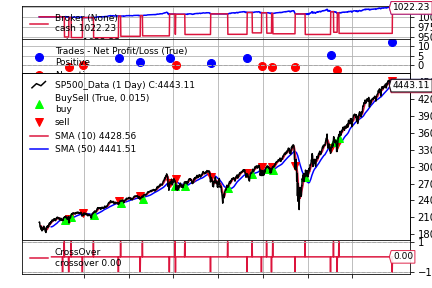

[[<Figure size 432x288 with 5 Axes>]]

In [23]:
# %matplotlib inline
cerebro.plot()

In [11]:
wins = back[0].analyzers.TradeAnalyzer.get_analysis()['won']['total']
wins

7

In [12]:
losses = back[0].analyzers.TradeAnalyzer.get_analysis()['lost']['total']
losses

7